In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import newton

In [2]:
#Ejemplo para leer una de las curvas de SNR Rubin
# pd.read_csv("magerr_g.txt", sep="\t", names=["mag","mag_err"], skiprows=1)

Text(0, 0.5, '$\\sigma_{mag}$')

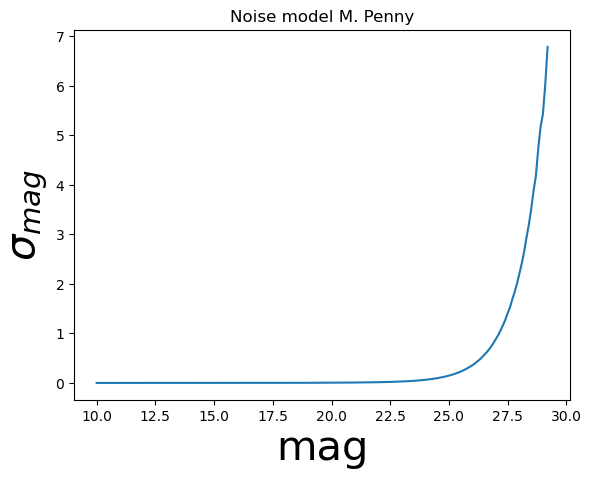

In [15]:

snr = pd.read_csv("snr_Roman.txt", sep=" ", names=["mag","err_mag"])

plt.plot(snr["mag"], snr["err_mag"])
plt.title('Noise model M. Penny')
plt.xlabel("mag",fontsize=30)
plt.ylabel("$\\sigma_{mag}$",fontsize=30)

# What is the amplification asociated to $5\sigma_{mag}$ to each mag in the Noise model plot?

Text(0, 0.5, '$\\mu_0 = 10^{2 \\sigma_{mag}}$')

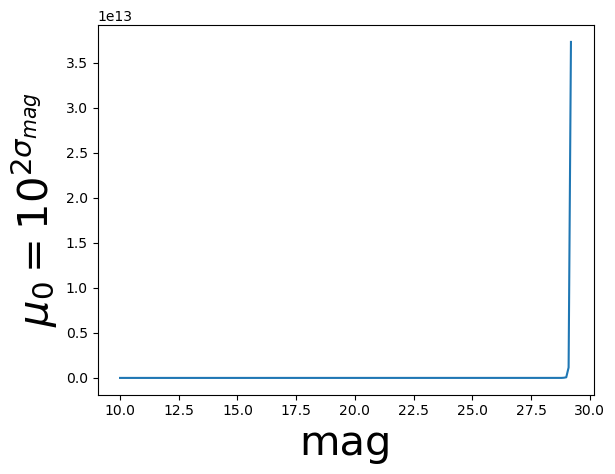

In [16]:
mu0 = 10**(5*snr['err_mag']/2.5)
plt.plot(snr['mag'],mu0)
plt.xlabel('mag', fontsize=30)
plt.ylabel('$\\mu_0 = 10^{2 \\sigma_{mag}}$', fontsize=30)

# What is the $u_0$ asociated to each $\mu_0$ obtained in the previus plot?

In [5]:
# Define PSPL function
def mu(u0):
    return (u0**2 + 2) / (u0 * np.sqrt(u0**2 + 4))

# Define the function to find roots of: f(u0) = mu(u0) - target_mu
def f(u0, target_mu):
    return mu(u0) - target_mu

initial_guesses = [0.5, 2.0, 5.0]  # Try different initial guesses
# Parameters
mu_plot = []
u0_plot = []
mag_plot = []
i=0
for target_mu in mu0:
    # Use the SciPy newton function to find u0 values for each initial guess
    u0_solutions = []
    for guess in initial_guesses:
        try:
            # Find root using Newton's method with SciPy
            u0_solution = newton(f, guess, args=(target_mu,), tol=1e-8, maxiter=100)
            # Ensure unique solutions
            if not any(np.isclose(u0_solution, sol, atol=1e-6) for sol in u0_solutions):
                u0_solutions.append(u0_solution)
        except RuntimeError:
            print(f"Newton's method did not converge for initial guess {guess}")

    # print("u0 values for mu =", target_mu, ":", u0_solutions)
    for u in u0_solutions:
        mu_plot.append(target_mu)
        u0_plot.append(u)
        mag_plot.append(snr['mag'][i])
    i+=1

Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 5.0
Newton's m

In [6]:
import numpy as np
from scipy.optimize import brentq

# Define the mu function
def mu(u0):
    return (u0**2 + 2) / (u0 * np.sqrt(u0**2 + 4))

# Define the function to find roots of: f(u0) = mu(u0) - target_mu
def f(u0, target_mu):
    return mu(u0) - target_mu

# List of intervals to test for root finding
intervals = [(0.1, 1.0), (1.0, 3.0), (3.0, 10.0)]

# Initialize lists for plot data
mu_plot = []
u0_plot = []
mag_plot = []

# Index counter for snr['mag']
i = 0

# Loop over target_mu values
for target_mu in mu0:
    u0_solutions = []
    for lower, upper in intervals:
        try:
            # Find root using brentq within the interval [lower, upper]
            u0_solution = brentq(f, lower, upper, args=(target_mu,))
            # Ensure unique solutions
            if not any(np.isclose(u0_solution, sol, atol=1e-6) for sol in u0_solutions):
                u0_solutions.append(u0_solution)
        except ValueError:
            print(f"No root found in interval [{lower}, {upper}] for mu = {target_mu}")

    # Collect data for plotting
    for u in u0_solutions:
        mu_plot.append(target_mu)
        u0_plot.append(u)
        mag_plot.append(snr['mag'][i])

    # Increment index for snr['mag']
    i += 1


No root found in interval [0.1, 1.0] for mu = 1.0046219434447308
No root found in interval [1.0, 3.0] for mu = 1.0046219434447308
No root found in interval [0.1, 1.0] for mu = 1.0046225448840638
No root found in interval [1.0, 3.0] for mu = 1.0046225448840638
No root found in interval [0.1, 1.0] for mu = 1.0046231925883635
No root found in interval [1.0, 3.0] for mu = 1.0046231925883635
No root found in interval [0.1, 1.0] for mu = 1.00462393282236
No root found in interval [1.0, 3.0] for mu = 1.00462393282236
No root found in interval [0.1, 1.0] for mu = 1.0046247193215792
No root found in interval [1.0, 3.0] for mu = 1.0046247193215792
No root found in interval [0.1, 1.0] for mu = 1.0046255520861294
No root found in interval [1.0, 3.0] for mu = 1.0046255520861294
No root found in interval [0.1, 1.0] for mu = 1.0046264773808835
No root found in interval [1.0, 3.0] for mu = 1.0046264773808835
No root found in interval [0.1, 1.0] for mu = 1.0046275414709045
No root found in interval [1.

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_92489/2119877637.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.title(r'Values of $u_0$ associated with each $mag(\mu_0)$.'+'\n$\Delta mag (\\mu_0)>5\\sigma_{mag}$')


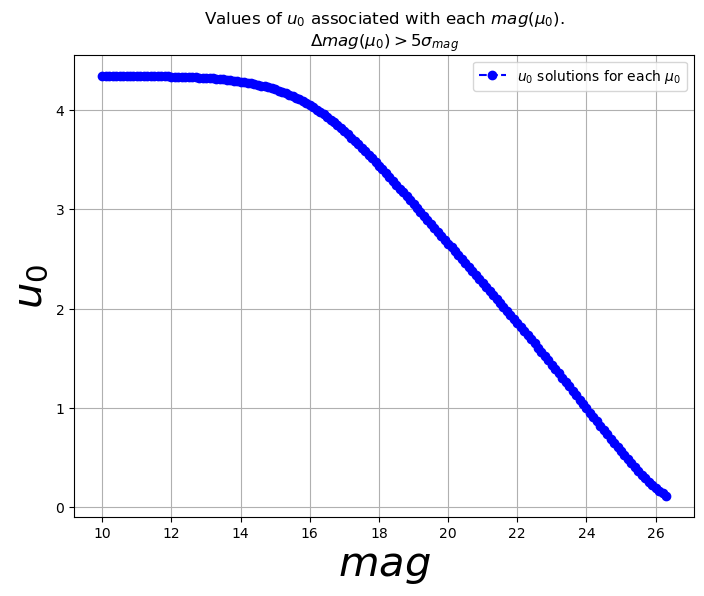

In [14]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(mag_plot, u0_plot, color='blue',marker='o',ls='--', label=r'$u_0$ solutions for each $\mu_0$')
plt.xlabel(r'$mag$',fontsize=30)
plt.ylabel(r'$u_0$',fontsize=30)
plt.title(r'Values of $u_0$ associated with each $mag(\mu_0)$.'+'\n$\Delta mag (\\mu_0)>5\\sigma_{mag}$')
plt.legend()
plt.grid(True)
plt.show()

# We are now considering the magnitude of a source and a lens. 

For given values of $\sigma_{\text{Source}}$ and $\sigma_{\text{Lens}}$, we want to determine the $u_0$ for an event that rises above $5 \sigma_{\text{Total}}$ at the peak, $t_0$.

Text(0.5, 0, '$\\sigma_{Total}$')

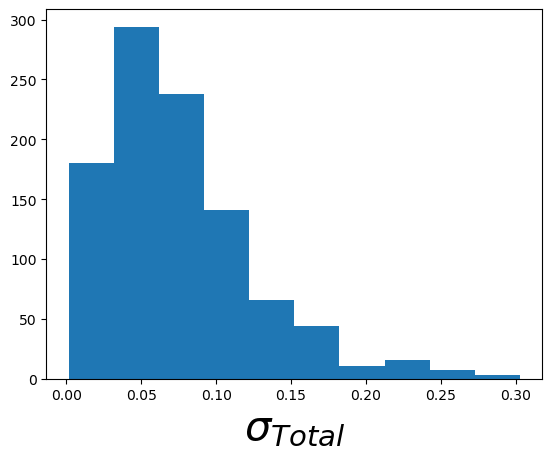

In [13]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(snr["mag"], snr["err_mag"])

# Generate new values for the interpolated curve (e.g., a denser set of points)
mag_interp = np.linspace(snr["mag"].min(), snr["mag"].max(), 1000)
err_mag_interp = cs(mag_interp)

mag_roman = pd.read_csv('PB_planet_split_1.csv')['W149']


mag_source = []
mag_lens = []
for i in range(1000):
    mag_source.append(mag_roman.iloc[np.random.randint(0,len(mag_roman))])
    mag_lens.append(mag_roman.iloc[np.random.randint(0,len(mag_roman))])

sigma_source = cs(mag_source)
sigma_lens = cs(mag_lens)



sigma_total = np.sqrt(sigma_source**2+sigma_lens**2)

plt.hist(sigma_total)
plt.xlabel(r'$\sigma_{Total}$',fontsize=30)
